## „É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„Å®Ë®≠ÂÆö

In [ ]:
# Êó•Êú¨„ÅÆÂõΩÂúüÂÜÖ„Åß„ÅÆÁ∑ØÂ∫¶ÁµåÂ∫¶„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂàÜÊûê
# HDBSCAN„Å®DBSCAN„ÅÆÊØîËºÉ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import  silhouette_score
import hdbscan
import folium
import warnings
warnings.filterwarnings('ignore')

# Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÅÆË®≠ÂÆö
plt.rcParams['font.family'] = 'Yu Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„ÉàÂÆå‰∫Ü")


ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„ÉàÂÆå‰∫Ü


## Êó•Êú¨„ÅÆÂõΩÂúüÂÜÖ„Åß„É©„É≥„ÉÄ„É†„Å™Á∑ØÂ∫¶ÁµåÂ∫¶„Éá„Éº„Çø„ÇíÁîüÊàê

ÁîüÊàê„Åï„Çå„Åü„Éá„Éº„Çø„Éù„Ç§„É≥„ÉàÊï∞: 1200
Á∑ØÂ∫¶ÁØÑÂõ≤: 24.0030 ~ 45.8092
ÁµåÂ∫¶ÁØÑÂõ≤: 122.0003 ~ 145.8757


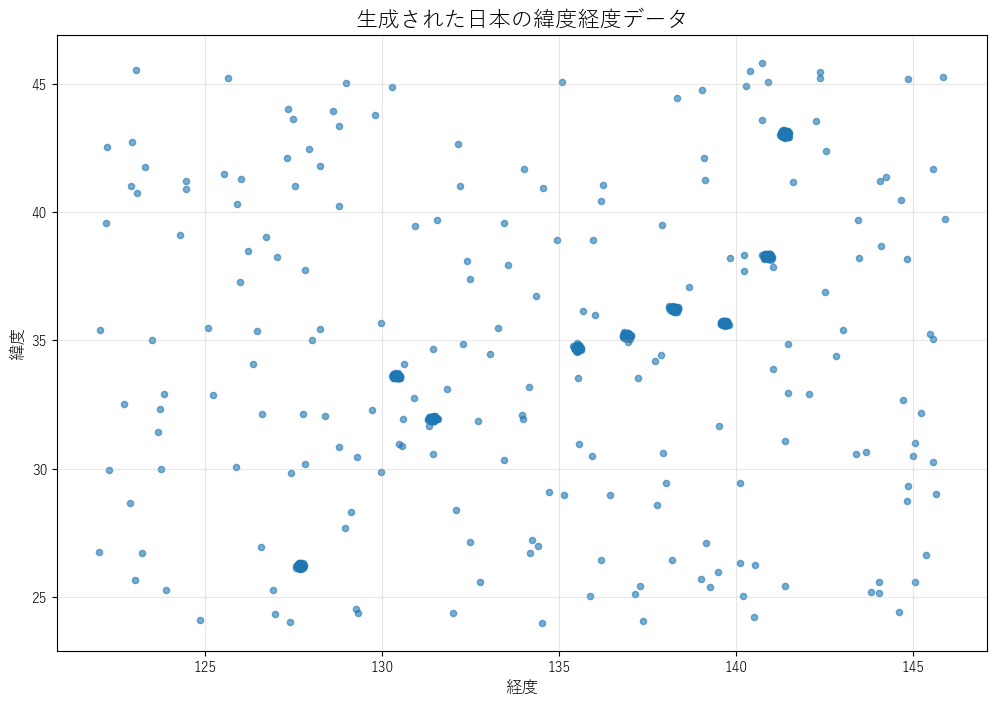

In [6]:
# Êó•Êú¨„ÅÆÂõΩÂúüÁØÑÂõ≤ÔºàÊ¶ÇÁÆóÔºâ
# Á∑ØÂ∫¶: Á¥Ñ24Â∫¶„Äú46Â∫¶ÔºàÂåóÁ∑ØÔºâ
# ÁµåÂ∫¶: Á¥Ñ122Â∫¶„Äú146Â∫¶ÔºàÊù±ÁµåÔºâ

np.random.seed(42)  # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ

# „Éá„Éº„Çø„Éù„Ç§„É≥„ÉàÊï∞
n_points = 1000

# Êó•Êú¨„ÅÆ‰∏ªË¶ÅÂú∞Âüü„ÇíÊ®°Êì¨„Åó„Åü„ÇØ„É©„Çπ„Çø„Éº‰∏≠ÂøÉ
cluster_centers = [
    (35.6762, 139.6503),  # Êù±‰∫¨
    (34.6937, 135.5023),  # Â§ßÈò™
    (35.1815, 136.9066),  # ÂêçÂè§Â±ã
    (43.0618, 141.3545),  # Êú≠Âπå
    (33.5902, 130.4017),  # Á¶èÂ≤°
    (38.2688, 140.8721),  # ‰ªôÂè∞
    (26.2124, 127.6809),  # ÈÇ£Ë¶á
    (36.2048, 138.2529),  # Èï∑Èáé
    (42.9849, 141.3645),  # Êó≠Â∑ù
    (31.9522, 131.4239),  # ÂÆÆÂ¥é
]

# ÂêÑ„ÇØ„É©„Çπ„Çø„Éº„Åã„Çâ„É©„É≥„ÉÄ„É†„Å´„Éù„Ç§„É≥„Éà„ÇíÁîüÊàê
data_points = []
for center_lat, center_lon in cluster_centers:
    # ÂêÑ„ÇØ„É©„Çπ„Çø„Éº„Åã„Çâ100„Éù„Ç§„É≥„Éà„Åö„Å§ÁîüÊàê
    n_cluster_points = n_points // len(cluster_centers)
    
    # Á∑ØÂ∫¶ÁµåÂ∫¶„ÅÆ„Å∞„Çâ„Å§„ÅçÔºàÁ¥Ñ10kmÁ®ãÂ∫¶Ôºâ
    lat_std = 0.05  # Á¥Ñ5.5km
    lon_std = 0.05  # Á¥Ñ5.5km
    
    cluster_lats = np.random.normal(center_lat, lat_std, n_cluster_points)
    cluster_lons = np.random.normal(center_lon, lon_std, n_cluster_points)
    
    for lat, lon in zip(cluster_lats, cluster_lons):
        data_points.append([lat, lon])

# „Éé„Ç§„Ç∫„Éù„Ç§„É≥„Éà„ÇíËøΩÂä†ÔºàÂÖ®‰Ωì„Å´Êï£„Çâ„Å∞„ÇãÔºâ
n_noise = 200
noise_lats = np.random.uniform(24, 46, n_noise)
noise_lons = np.random.uniform(122, 146, n_noise)

for lat, lon in zip(noise_lats, noise_lons):
    data_points.append([lat, lon])

# DataFrame„Å´Â§âÊèõ
df = pd.DataFrame(data_points, columns=['latitude', 'longitude'])

print(f"ÁîüÊàê„Åï„Çå„Åü„Éá„Éº„Çø„Éù„Ç§„É≥„ÉàÊï∞: {len(df)}")
print(f"Á∑ØÂ∫¶ÁØÑÂõ≤: {df['latitude'].min():.4f} ~ {df['latitude'].max():.4f}")
print(f"ÁµåÂ∫¶ÁØÑÂõ≤: {df['longitude'].min():.4f} ~ {df['longitude'].max():.4f}")

# „Éá„Éº„Çø„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.6, s=20)
plt.title('ÁîüÊàê„Åï„Çå„ÅüÊó•Êú¨„ÅÆÁ∑ØÂ∫¶ÁµåÂ∫¶„Éá„Éº„Çø', fontsize=16)
plt.xlabel('ÁµåÂ∫¶', fontsize=12)
plt.ylabel('Á∑ØÂ∫¶', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## „Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ„Å®„Çπ„Ç±„Éº„É™„É≥„Ç∞

In [ ]:
# „Éá„Éº„Çø„ÅÆÂâçÂá¶ÁêÜ
print("„Éá„Éº„Çø„ÅÆÂü∫Êú¨Áµ±Ë®à:")
print(df.describe())

# Á∑ØÂ∫¶ÁµåÂ∫¶„Çí„É°„Éº„Éà„É´Âçò‰Ωç„Å´Â§âÊèõÔºàËøë‰ººÔºâ
# 1Â∫¶„ÅÆÁ∑ØÂ∫¶ ‚âà 111,000 m
# 1Â∫¶„ÅÆÁµåÂ∫¶ ‚âà 111,000 * cos(Á∑ØÂ∫¶) m

def lat_lon_to_meters(lat, lon):
    """Á∑ØÂ∫¶ÁµåÂ∫¶„Çí„É°„Éº„Éà„É´Âçò‰Ωç„Å´Â§âÊèõÔºàÁ∞°ÊòìÁâàÔºâ"""
    lat_m = lat * 111000  # Á∑ØÂ∫¶„Çí„É°„Éº„Éà„É´„Å´Â§âÊèõ
    lon_m = lon * 111000 * np.cos(np.radians(lat))  # ÁµåÂ∫¶„Çí„É°„Éº„Éà„É´„Å´Â§âÊèõ
    return lat_m, lon_m

# „É°„Éº„Éà„É´Âçò‰Ωç„Å´Â§âÊèõ
df['lat_m'] = df['latitude'] * 111000
df['lon_m'] = df['longitude'] * 111000 * np.cos(np.radians(df['latitude']))

# „Çπ„Ç±„Éº„É™„É≥„Ç∞Áî®„ÅÆ„Éá„Éº„Çø
X_meters = df[['lat_m', 'lon_m']].values

print("\n„Çπ„Ç±„Éº„É™„É≥„Ç∞Âæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂:", X_meters.shape)
print("„Çπ„Ç±„Éº„É™„É≥„Ç∞Âæå„ÅÆÂü∫Êú¨Áµ±Ë®à:")
print(pd.DataFrame(X_meters, columns=['lat_m_scaled', 'lon_m_scaled']).describe())

„Éá„Éº„Çø„ÅÆÂü∫Êú¨Áµ±Ë®à:
          latitude    longitude         lat_m         lon_m
count  1200.000000  1200.000000  1.200000e+03  1.200000e+03
mean     35.563097   135.978891  3.947504e+06  1.221155e+07
std       5.075816     5.246843  5.634156e+05  6.026020e+05
min      24.002963   122.000279  2.664329e+06  9.567291e+06
25%      33.531292   131.392784  3.721973e+06  1.204587e+07
50%      35.249888   136.935292  3.912738e+06  1.236925e+07
75%      38.293862   140.873987  4.250619e+06  1.242986e+07
max      45.809214   145.875663  5.084823e+06  1.461196e+07

„Çπ„Ç±„Éº„É™„É≥„Ç∞Âæå„ÅÆ„Éá„Éº„ÇøÂΩ¢Áä∂: (1200, 2)
„Çπ„Ç±„Éº„É™„É≥„Ç∞Âæå„ÅÆÂü∫Êú¨Áµ±Ë®à:
       lat_m_scaled  lon_m_scaled
count  1.200000e+03  1.200000e+03
mean   3.947504e+06  1.221155e+07
std    5.634156e+05  6.026020e+05
min    2.664329e+06  9.567291e+06
25%    3.721973e+06  1.204587e+07
50%    3.912738e+06  1.236925e+07
75%    4.250619e+06  1.242986e+07
max    5.084823e+06  1.461196e+07


##  DBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„ÅÆÂÆüË£Ö„Å®„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

=== DBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ ===

DBSCAN„ÅÆ‰∏ªË¶Å„Éë„É©„É°„Éº„Çø:
1. eps: ËøëÂÇçÁÇπ„ÇíÊé¢Á¥¢„Åô„ÇãÂçäÂæÑÔºà„É°„Éº„Éà„É´Ôºâ
2. min_samples: „ÇØ„É©„Çπ„Çø„Éº„ÇíÂΩ¢Êàê„Åô„Çã„Åü„ÇÅ„ÅÆÊúÄÂ∞èÁÇπÊï∞

ÊâãÈ†Ü:
1. eps„Éë„É©„É°„Éº„Çø„ÇíÊßò„ÄÖ„Å™ÂÄ§„ÅßË©¶Ë°å
2. min_samples„ÅØ„Éá„Éº„Çø„Çµ„Ç§„Ç∫„Å´Âøú„Åò„Å¶Ë™øÊï¥
3. „ÇØ„É©„Çπ„Çø„ÉºÊï∞„Å®„Éé„Ç§„Ç∫ÁÇπ„ÅÆÂâ≤Âêà„ÇíÁ¢∫Ë™ç
4. „Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢„Åß„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂìÅË≥™„ÇíË©ï‰æ°


DBSCAN„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞ÁµêÊûú:
      eps  min_samples  n_clusters  n_noise  noise_ratio  silhouette_score
11   5000           20           9      352     0.293333          0.949721
10   5000           15           9      298     0.248333          0.945912
9    5000           10           9      249     0.207500          0.940441
8    5000            5           9      219     0.182500          0.937969
13  10000           10           9      207     0.172500          0.935389
15  10000           20           9      208     0.173333          0.935388
1

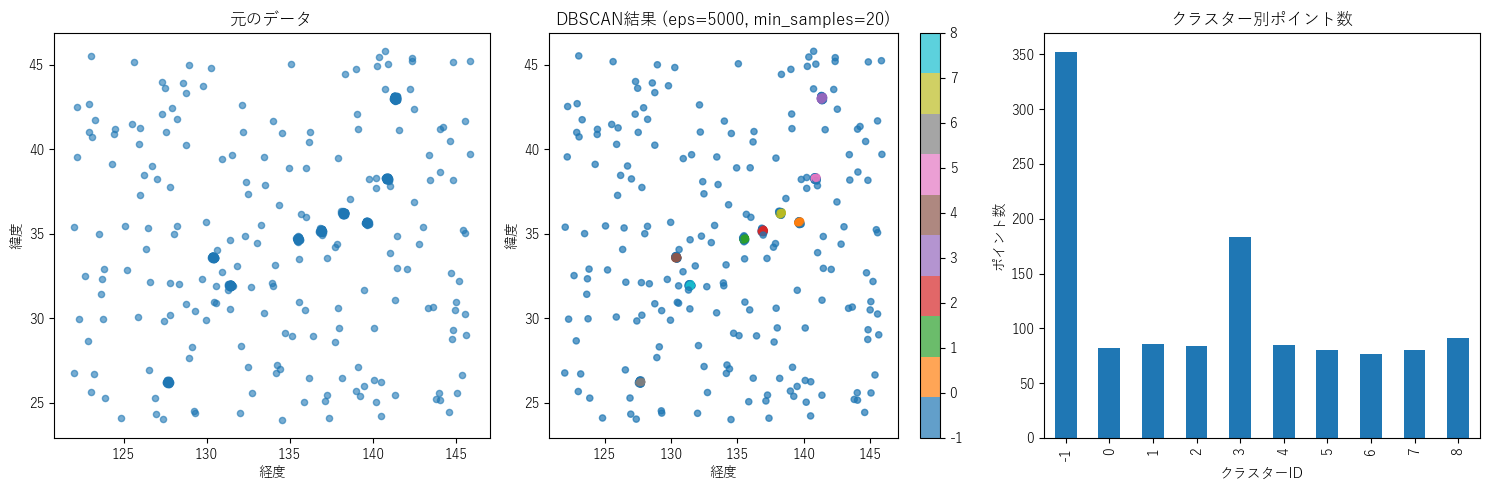

In [ ]:
# DBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
print("=== DBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ ===")

# „Éë„É©„É°„Éº„Çø„ÅÆË™¨Êòé
print("""
DBSCAN„ÅÆ‰∏ªË¶Å„Éë„É©„É°„Éº„Çø:
1. eps: ËøëÂÇçÁÇπ„ÇíÊé¢Á¥¢„Åô„ÇãÂçäÂæÑÔºà„É°„Éº„Éà„É´Ôºâ
2. min_samples: „ÇØ„É©„Çπ„Çø„Éº„ÇíÂΩ¢Êàê„Åô„Çã„Åü„ÇÅ„ÅÆÊúÄÂ∞èÁÇπÊï∞

ÊâãÈ†Ü:
1. eps„Éë„É©„É°„Éº„Çø„ÇíÊßò„ÄÖ„Å™ÂÄ§„ÅßË©¶Ë°å
2. min_samples„ÅØ„Éá„Éº„Çø„Çµ„Ç§„Ç∫„Å´Âøú„Åò„Å¶Ë™øÊï¥
3. „ÇØ„É©„Çπ„Çø„ÉºÊï∞„Å®„Éé„Ç§„Ç∫ÁÇπ„ÅÆÂâ≤Âêà„ÇíÁ¢∫Ë™ç
4. „Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢„Åß„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂìÅË≥™„ÇíË©ï‰æ°
""")

# Êßò„ÄÖ„Å™epsÂÄ§„ÅßDBSCAN„ÇíË©¶Ë°å
eps_values = [1000, 2000, 5000, 10000, 15000, 20000]  # „É°„Éº„Éà„É´
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_params = {}
best_labels = None

results_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCANÂÆüË°å
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_meters)
        
        # „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÅÆË©ï‰æ°
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        
        # „Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢Ôºà„Éé„Ç§„Ç∫ÁÇπ„ÇíÈô§„ÅèÔºâ
        if n_clusters > 1:
            mask = labels != -1
            if sum(mask) > 1:
                try:
                    silhouette_avg = silhouette_score(X_meters[mask], labels[mask])
                except:
                    silhouette_avg = -1
            else:
                silhouette_avg = -1
        else:
            silhouette_avg = -1
        
        results_dbscan.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette_score': silhouette_avg
        })
        
        # ÊúÄËâØ„ÅÆÁµêÊûú„ÇíË®òÈå≤Ôºà„ÇØ„É©„Çπ„Çø„Éº„ÅåÂ≠òÂú®„Åó„ÄÅ„Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢„ÅåÊúâÂäπ„Å™Â†¥ÂêàÔºâ
        if silhouette_avg > best_score and n_clusters > 0 and silhouette_avg != -1:
            best_score = silhouette_avg
            best_params = {'eps': eps, 'min_samples': min_samples}
            best_labels = labels.copy()

# ÁµêÊûú„ÇíDataFrame„ÅßË°®Á§∫
results_df = pd.DataFrame(results_dbscan)
print("\nDBSCAN„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞ÁµêÊûú:")
print(results_df.sort_values('silhouette_score', ascending=False).head(10))

# best_params„ÅåÁ©∫„Åß„Å™„ÅÑ„Åã„ÉÅ„Çß„ÉÉ„ÇØ
if best_params:
    print(f"\nÊúÄËâØ„ÅÆ„Éë„É©„É°„Éº„Çø: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
    print(f"ÊúÄËâØ„ÅÆ„Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢: {best_score:.4f}")
    
    # ÊúÄËâØ„ÅÆÁµêÊûú„Åß„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂÆüË°å
    best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
    best_dbscan_labels = best_dbscan.fit_predict(X_meters)
    
    # ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
    plt.figure(figsize=(15, 5))
    
    # ÂÖÉ„ÅÆ„Éá„Éº„Çø
    plt.subplot(1, 3, 1)
    plt.scatter(df['longitude'], df['latitude'], alpha=0.6, s=20)
    plt.title('ÂÖÉ„ÅÆ„Éá„Éº„Çø')
    plt.xlabel('ÁµåÂ∫¶')
    plt.ylabel('Á∑ØÂ∫¶')
    
    # DBSCANÁµêÊûú
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(df['longitude'], df['latitude'], c=best_dbscan_labels, 
                         cmap='tab10', alpha=0.7, s=20)
    plt.title(f'DBSCANÁµêÊûú (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})')
    plt.xlabel('ÁµåÂ∫¶')
    plt.ylabel('Á∑ØÂ∫¶')
    plt.colorbar(scatter)
    
    # „ÇØ„É©„Çπ„Çø„ÉºÂà•„ÅÆÁµ±Ë®à
    plt.subplot(1, 3, 3)
    cluster_counts = pd.Series(best_dbscan_labels).value_counts().sort_index()
    cluster_counts.plot(kind='bar')
    plt.title('„ÇØ„É©„Çπ„Çø„ÉºÂà•„Éù„Ç§„É≥„ÉàÊï∞')
    plt.xlabel('„ÇØ„É©„Çπ„Çø„ÉºID')
    plt.ylabel('„Éù„Ç§„É≥„ÉàÊï∞')
    
    plt.tight_layout()
    plt.show()
 

##  HDBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„ÅÆÂÆüË£Ö„Å®„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

=== HDBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ ===

HDBSCAN„ÅÆ‰∏ªË¶Å„Éë„É©„É°„Éº„Çø:
1. min_cluster_size: „ÇØ„É©„Çπ„Çø„Éº„ÅÆÊúÄÂ∞è„Çµ„Ç§„Ç∫
2. min_samples: „Ç≥„Ç¢„Éù„Ç§„É≥„Éà„ÅÆÊúÄÂ∞è„Çµ„É≥„Éó„É´Êï∞
3. cluster_selection_epsilon: „ÇØ„É©„Çπ„Çø„ÉºÈÅ∏Êäû„ÅÆÈñæÂÄ§

ÊâãÈ†Ü:
1. min_cluster_size„ÇíÊßò„ÄÖ„Å™ÂÄ§„ÅßË©¶Ë°å
2. min_samples„ÇíË™øÊï¥„Åó„Å¶„Éé„Ç§„Ç∫ÁÇπ„ÅÆÂâ≤Âêà„ÇíÂà∂Âæ°
3. „ÇØ„É©„Çπ„Çø„ÉºÊï∞„Å®„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂìÅË≥™„ÇíË©ï‰æ°
4. DBSCAN„Å®„ÅÆÁµêÊûú„ÇíÊØîËºÉ


HDBSCAN„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞ÁµêÊûú:
    min_cluster_size  min_samples  n_clusters  n_noise  noise_ratio  \
2                 10           15          10      140     0.116667   
19               100           20           9      143     0.119167   
7                 20           20           9      143     0.119167   
3                 10           20           9      143     0.119167   
15                50           20           9      143     0.119167   
11                30           20           9      143     0.119167   
1 

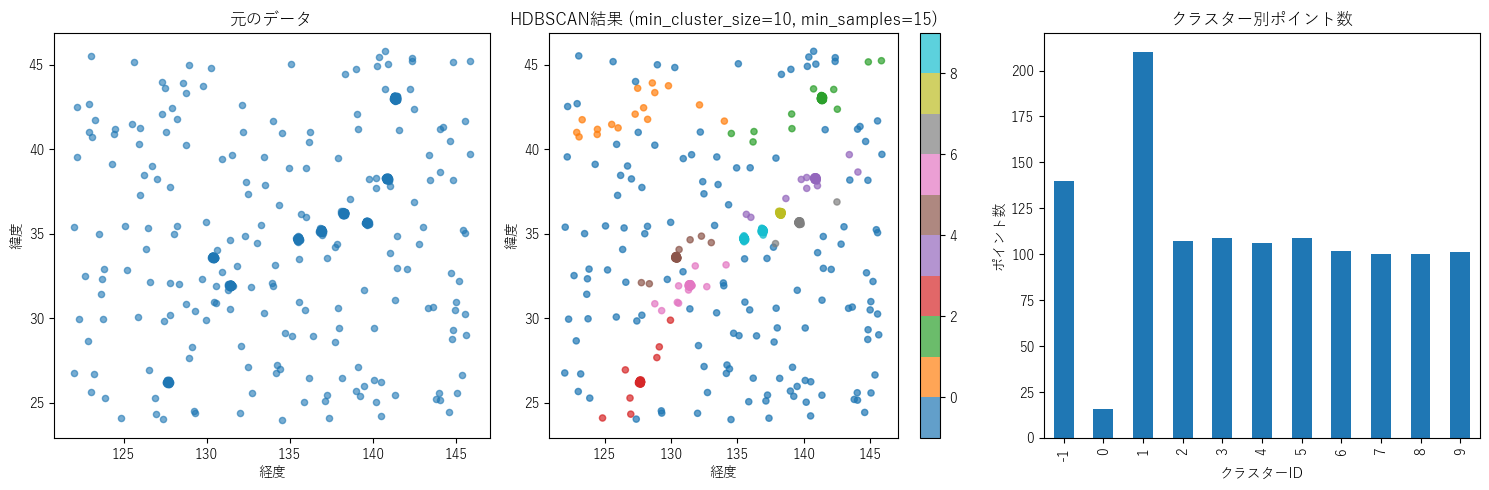

In [14]:
# HDBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
print("=== HDBSCAN„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ ===")

# „Éë„É©„É°„Éº„Çø„ÅÆË™¨Êòé
print("""
HDBSCAN„ÅÆ‰∏ªË¶Å„Éë„É©„É°„Éº„Çø:
1. min_cluster_size: „ÇØ„É©„Çπ„Çø„Éº„ÅÆÊúÄÂ∞è„Çµ„Ç§„Ç∫
2. min_samples: „Ç≥„Ç¢„Éù„Ç§„É≥„Éà„ÅÆÊúÄÂ∞è„Çµ„É≥„Éó„É´Êï∞
3. cluster_selection_epsilon: „ÇØ„É©„Çπ„Çø„ÉºÈÅ∏Êäû„ÅÆÈñæÂÄ§

ÊâãÈ†Ü:
1. min_cluster_size„ÇíÊßò„ÄÖ„Å™ÂÄ§„ÅßË©¶Ë°å
2. min_samples„ÇíË™øÊï¥„Åó„Å¶„Éé„Ç§„Ç∫ÁÇπ„ÅÆÂâ≤Âêà„ÇíÂà∂Âæ°
3. „ÇØ„É©„Çπ„Çø„ÉºÊï∞„Å®„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂìÅË≥™„ÇíË©ï‰æ°
4. DBSCAN„Å®„ÅÆÁµêÊûú„ÇíÊØîËºÉ
""")

# Êßò„ÄÖ„Å™„Éë„É©„É°„Éº„Çø„ÅßHDBSCAN„ÇíË©¶Ë°å
min_cluster_size_values = [10, 20, 30, 50, 100]
min_samples_values = [5, 10, 15, 20]

best_hdbscan_score = -1
best_hdbscan_params = {}
best_hdbscan_labels = None

results_hdbscan = []

for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        # HDBSCANÂÆüË°å
        hdbscan_clusterer = hdbscan.HDBSCAN(
            min_cluster_size=min_cluster_size,
            min_samples=min_samples,
            metric='euclidean'
        )
        labels = hdbscan_clusterer.fit_predict(X_meters)
        
        # „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûú„ÅÆË©ï‰æ°
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        noise_ratio = n_noise / len(labels)
        
        # „Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢Ôºà„Éé„Ç§„Ç∫ÁÇπ„ÇíÈô§„ÅèÔºâ
        if n_clusters > 1:
            mask = labels != -1
            if sum(mask) > 1:
                try:
                    silhouette_avg = silhouette_score(X_meters[mask], labels[mask])
                except:
                    silhouette_avg = -1
            else:
                silhouette_avg = -1
        else:
            silhouette_avg = -1
        
        results_hdbscan.append({
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_ratio': noise_ratio,
            'silhouette_score': silhouette_avg
        })
        
        # ÊúÄËâØ„ÅÆÁµêÊûú„ÇíË®òÈå≤
        if silhouette_avg > best_hdbscan_score and n_clusters > 0:
            best_hdbscan_score = silhouette_avg
            best_hdbscan_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples}
            best_hdbscan_labels = labels.copy()

# ÁµêÊûú„ÇíDataFrame„ÅßË°®Á§∫
results_hdbscan_df = pd.DataFrame(results_hdbscan)
print("\nHDBSCAN„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞ÁµêÊûú:")
print(results_hdbscan_df.sort_values('silhouette_score', ascending=False).head(10))

print(f"\nÊúÄËâØ„ÅÆ„Éë„É©„É°„Éº„Çø: min_cluster_size={best_hdbscan_params['min_cluster_size']}, min_samples={best_hdbscan_params['min_samples']}")
print(f"ÊúÄËâØ„ÅÆ„Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢: {best_hdbscan_score:.4f}")

# ÊúÄËâØ„ÅÆÁµêÊûú„Åß„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂÆüË°å
best_hdbscan = hdbscan.HDBSCAN(
    min_cluster_size=best_hdbscan_params['min_cluster_size'],
    min_samples=best_hdbscan_params['min_samples'],
    metric='euclidean'
)
best_hdbscan_labels = best_hdbscan.fit_predict(X_meters)

# ÁµêÊûú„ÅÆÂèØË¶ñÂåñ
plt.figure(figsize=(15, 5))

# ÂÖÉ„ÅÆ„Éá„Éº„Çø
plt.subplot(1, 3, 1)
plt.scatter(df['longitude'], df['latitude'], alpha=0.6, s=20)
plt.title('ÂÖÉ„ÅÆ„Éá„Éº„Çø')
plt.xlabel('ÁµåÂ∫¶')
plt.ylabel('Á∑ØÂ∫¶')

# HDBSCANÁµêÊûú
plt.subplot(1, 3, 2)
scatter = plt.scatter(df['longitude'], df['latitude'], c=best_hdbscan_labels, 
                     cmap='tab10', alpha=0.7, s=20)
plt.title(f'HDBSCANÁµêÊûú (min_cluster_size={best_hdbscan_params["min_cluster_size"]}, min_samples={best_hdbscan_params["min_samples"]})')
plt.xlabel('ÁµåÂ∫¶')
plt.ylabel('Á∑ØÂ∫¶')
plt.colorbar(scatter)

# „ÇØ„É©„Çπ„Çø„ÉºÂà•„ÅÆÁµ±Ë®à
plt.subplot(1, 3, 3)
cluster_counts = pd.Series(best_hdbscan_labels).value_counts().sort_index()
cluster_counts.plot(kind='bar')
plt.title('„ÇØ„É©„Çπ„Çø„ÉºÂà•„Éù„Ç§„É≥„ÉàÊï∞')
plt.xlabel('„ÇØ„É©„Çπ„Çø„ÉºID')
plt.ylabel('„Éù„Ç§„É≥„ÉàÊï∞')

plt.tight_layout()
plt.show()

##  DBSCAN„Å®HDBSCAN„ÅÆÁµêÊûúÊØîËºÉ

=== DBSCAN vs HDBSCAN ÊØîËºÉ ===

ÊâãÊ≥ïÂà•ÊØîËºÉÁµêÊûú:
        ÊâãÊ≥ï  „ÇØ„É©„Çπ„Çø„ÉºÊï∞  „Éé„Ç§„Ç∫ÁÇπ    „Éé„Ç§„Ç∫ÁÇπÂâ≤Âêà  „Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢
0   DBSCAN       9   352  0.293333  0.949721
1  HDBSCAN      10   140  0.116667  0.896792

=== Ë©≥Á¥∞ÂàÜÊûê ===

DBSCAN - „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫Áµ±Ë®à:
  ÊúÄÂ∞è„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 77
  ÊúÄÂ§ß„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 352
  Âπ≥Âùá„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 120.0
  Ê®ôÊ∫ñÂÅèÂ∑Æ: 87.4

HDBSCAN - „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫Áµ±Ë®à:
  ÊúÄÂ∞è„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 16
  ÊúÄÂ§ß„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 210
  Âπ≥Âùá„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: 109.1
  Ê®ôÊ∫ñÂÅèÂ∑Æ: 44.8


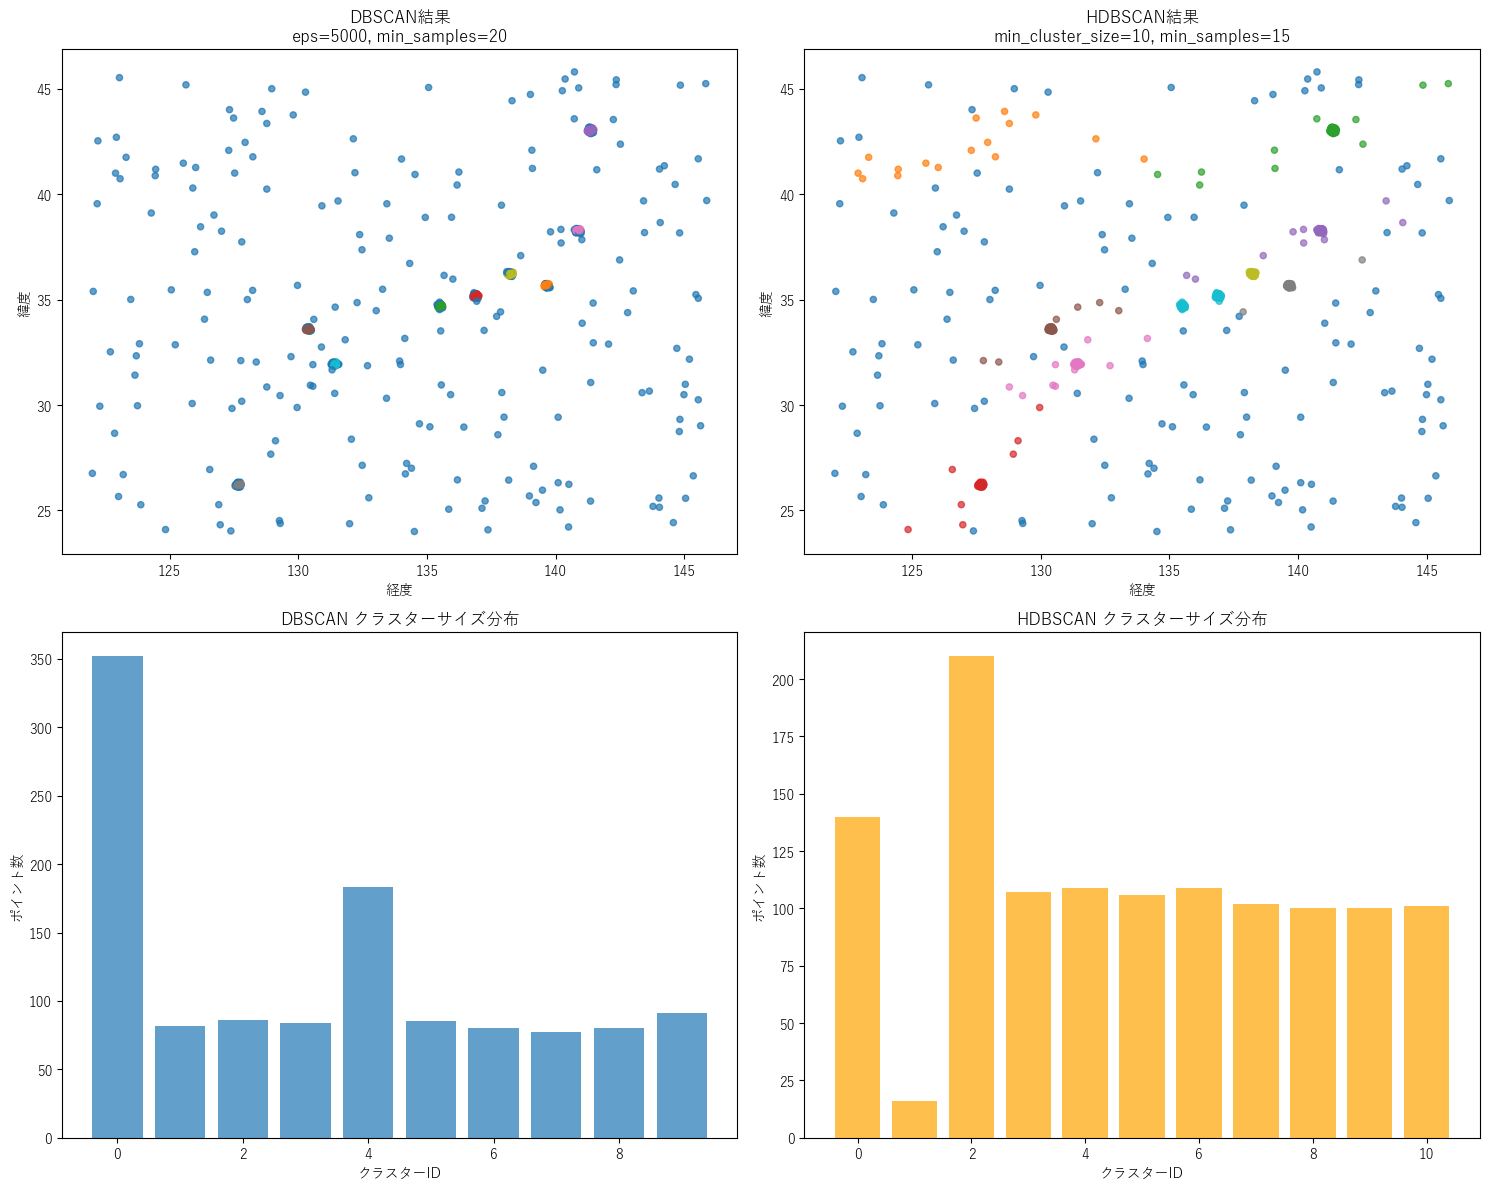

In [15]:
# DBSCAN„Å®HDBSCAN„ÅÆÁµêÊûúÊØîËºÉ
print("=== DBSCAN vs HDBSCAN ÊØîËºÉ ===")

# ‰∏°ÊâãÊ≥ï„ÅÆÁµêÊûú„ÇíÊØîËºÉ
comparison_data = {
    'ÊâãÊ≥ï': ['DBSCAN', 'HDBSCAN'],
    '„ÇØ„É©„Çπ„Çø„ÉºÊï∞': [
        len(set(best_dbscan_labels)) - (1 if -1 in best_dbscan_labels else 0),
        len(set(best_hdbscan_labels)) - (1 if -1 in best_hdbscan_labels else 0)
    ],
    '„Éé„Ç§„Ç∫ÁÇπ': [
        list(best_dbscan_labels).count(-1),
        list(best_hdbscan_labels).count(-1)
    ],
    '„Éé„Ç§„Ç∫ÁÇπÂâ≤Âêà': [
        list(best_dbscan_labels).count(-1) / len(best_dbscan_labels),
        list(best_hdbscan_labels).count(-1) / len(best_hdbscan_labels)
    ],
    '„Ç∑„É´„Ç®„ÉÉ„Éà„Çπ„Ç≥„Ç¢': [best_score, best_hdbscan_score]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nÊâãÊ≥ïÂà•ÊØîËºÉÁµêÊûú:")
print(comparison_df)

# Ë©≥Á¥∞„Å™ÊØîËºÉÂàÜÊûê
print("\n=== Ë©≥Á¥∞ÂàÜÊûê ===")

# „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫„ÅÆÂàÜÂ∏ÉÊØîËºÉ
dbscan_cluster_sizes = pd.Series(best_dbscan_labels).value_counts().sort_index()
hdbscan_cluster_sizes = pd.Series(best_hdbscan_labels).value_counts().sort_index()

print(f"\nDBSCAN - „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫Áµ±Ë®à:")
print(f"  ÊúÄÂ∞è„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {dbscan_cluster_sizes.min()}")
print(f"  ÊúÄÂ§ß„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {dbscan_cluster_sizes.max()}")
print(f"  Âπ≥Âùá„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {dbscan_cluster_sizes.mean():.1f}")
print(f"  Ê®ôÊ∫ñÂÅèÂ∑Æ: {dbscan_cluster_sizes.std():.1f}")

print(f"\nHDBSCAN - „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫Áµ±Ë®à:")
print(f"  ÊúÄÂ∞è„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {hdbscan_cluster_sizes.min()}")
print(f"  ÊúÄÂ§ß„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {hdbscan_cluster_sizes.max()}")
print(f"  Âπ≥Âùá„ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫: {hdbscan_cluster_sizes.mean():.1f}")
print(f"  Ê®ôÊ∫ñÂÅèÂ∑Æ: {hdbscan_cluster_sizes.std():.1f}")

# ÂèØË¶ñÂåñÊØîËºÉ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# DBSCANÁµêÊûú
scatter1 = axes[0,0].scatter(df['longitude'], df['latitude'], c=best_dbscan_labels, 
                             cmap='tab10', alpha=0.7, s=20)
axes[0,0].set_title(f'DBSCANÁµêÊûú\neps={best_params["eps"]}, min_samples={best_params["min_samples"]}')
axes[0,0].set_xlabel('ÁµåÂ∫¶')
axes[0,0].set_ylabel('Á∑ØÂ∫¶')

# HDBSCANÁµêÊûú
scatter2 = axes[0,1].scatter(df['longitude'], df['latitude'], c=best_hdbscan_labels, 
                             cmap='tab10', alpha=0.7, s=20)
axes[0,1].set_title(f'HDBSCANÁµêÊûú\nmin_cluster_size={best_hdbscan_params["min_cluster_size"]}, min_samples={best_hdbscan_params["min_samples"]}')
axes[0,1].set_xlabel('ÁµåÂ∫¶')
axes[0,1].set_ylabel('Á∑ØÂ∫¶')

# „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫ÂàÜÂ∏ÉÊØîËºÉ
axes[1,0].bar(range(len(dbscan_cluster_sizes)), dbscan_cluster_sizes.values, alpha=0.7, label='DBSCAN')
axes[1,0].set_title('DBSCAN „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫ÂàÜÂ∏É')
axes[1,0].set_xlabel('„ÇØ„É©„Çπ„Çø„ÉºID')
axes[1,0].set_ylabel('„Éù„Ç§„É≥„ÉàÊï∞')

axes[1,1].bar(range(len(hdbscan_cluster_sizes)), hdbscan_cluster_sizes.values, alpha=0.7, label='HDBSCAN', color='orange')
axes[1,1].set_title('HDBSCAN „ÇØ„É©„Çπ„Çø„Éº„Çµ„Ç§„Ç∫ÂàÜÂ∏É')
axes[1,1].set_xlabel('„ÇØ„É©„Çπ„Çø„ÉºID')
axes[1,1].set_ylabel('„Éù„Ç§„É≥„ÉàÊï∞')

plt.tight_layout()
plt.show()

## Âú∞Âõ≥‰∏ä„Åß„ÅÆÂèØË¶ñÂåñÔºàFolium‰ΩøÁî®Ôºâ

In [16]:
# Âú∞Âõ≥‰∏ä„Åß„ÅÆÂèØË¶ñÂåñÔºàDBSCAN „Å® HDBSCAN „ÅÆÊØîËºÉÔºâ
print("=== Âú∞Âõ≥‰∏ä„Åß„ÅÆÂèØË¶ñÂåñÔºàDBSCAN vs HDBSCANÔºâ ===")

# Êó•Êú¨„ÅÆ‰∏≠ÂøÉÂ∫ßÊ®ô
japan_center = [df['latitude'].mean(), df['longitude'].mean()]

# Âú∞Âõ≥„ÅÆ‰ΩúÊàê
m = folium.Map(location=japan_center, zoom_start=6, tiles='OpenStreetMap')

# „ÇØ„É©„Çπ„Çø„ÉºÂà•„ÅÆËâ≤„É™„Çπ„Éà
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
          'beige', 'darkgreen', 'darkblue', 'darkpurple', 'pink', 'lightblue', 
          'lightgreen', 'gray', 'black', 'lightgray']

# „É¨„Ç§„É§„Éº„Ç∞„É´„Éº„Éó„Çí‰ΩúÊàê
dbscan_group = folium.FeatureGroup(name='DBSCANÁµêÊûú')
hdbscan_group = folium.FeatureGroup(name='HDBSCANÁµêÊûú')

# DBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà
print("DBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà‰∏≠...")
for idx, row in df.iterrows():
    cluster_id = best_dbscan_labels[idx]
    if cluster_id == -1:
        # „Éé„Ç§„Ç∫ÁÇπ„ÅØÂ∞è„Åï„Å™Èªí„ÅÑÁÇπ„ÅßË°®Á§∫
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            color='black',
            fill=True,
            fillColor='black',
            fillOpacity=0.7,
            popup=f'DBSCAN „Éé„Ç§„Ç∫ÁÇπ (ID: {idx})',
            tooltip=f'DBSCAN „Éé„Ç§„Ç∫'
        ).add_to(dbscan_group)
    else:
        # „ÇØ„É©„Çπ„Çø„ÉºÁÇπ„ÅØËâ≤ÂàÜ„Åë„Åó„Å¶Ë°®Á§∫
        color = colors[cluster_id % len(colors)]
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=4,
            color=color,
            fill=True,
            fillColor=color,
            fillOpacity=0.7,
            popup=f'DBSCAN „ÇØ„É©„Çπ„Çø„Éº{cluster_id} (ID: {idx})',
            tooltip=f'DBSCAN C{cluster_id}'
        ).add_to(dbscan_group)

# DBSCAN „ÇØ„É©„Çπ„Çø„Éº‰∏≠ÂøÉ„ÇíË°®Á§∫
for cluster_id in set(best_dbscan_labels):
    if cluster_id != -1:
        cluster_points = df[best_dbscan_labels == cluster_id]
        center_lat = cluster_points['latitude'].mean()
        center_lon = cluster_points['longitude'].mean()
        
        folium.Marker(
            location=[center_lat, center_lon],
            icon=folium.Icon(color='red', icon='star'),
            popup=f'DBSCAN „ÇØ„É©„Çπ„Çø„Éº{cluster_id}‰∏≠ÂøÉ<br>„Éù„Ç§„É≥„ÉàÊï∞: {len(cluster_points)}',
            tooltip=f'DBSCAN C{cluster_id}‰∏≠ÂøÉ'
        ).add_to(dbscan_group)

# HDBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà
print("HDBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà‰∏≠...")
for idx, row in df.iterrows():
    cluster_id = best_hdbscan_labels[idx]
    # ‰ΩçÁΩÆ„ÇíÂ∞ë„Åó„Åö„Çâ„Åó„Å¶ÈáçË§á„ÇíÈÅø„Åë„Çã
    lat_offset = 0.01  # Á¥Ñ1kmÁ®ãÂ∫¶„ÅÆ„Ç™„Éï„Çª„ÉÉ„Éà
    lon_offset = 0.01
    
    if cluster_id == -1:
        # „Éé„Ç§„Ç∫ÁÇπ„ÅØÂ∞è„Åï„Å™ÁÅ∞Ëâ≤„ÅÆÁÇπ„ÅßË°®Á§∫
        folium.CircleMarker(
            location=[row['latitude'] + lat_offset, row['longitude'] + lon_offset],
            radius=3,
            color='gray',
            fill=True,
            fillColor='gray',
            fillOpacity=0.7,
            popup=f'HDBSCAN „Éé„Ç§„Ç∫ÁÇπ (ID: {idx})',
            tooltip=f'HDBSCAN „Éé„Ç§„Ç∫'
        ).add_to(hdbscan_group)
    else:
        # „ÇØ„É©„Çπ„Çø„ÉºÁÇπ„ÅØËâ≤ÂàÜ„Åë„Åó„Å¶Ë°®Á§∫ÔºàÂõõËßíÂΩ¢„ÅßÂå∫Âà•Ôºâ
        color = colors[cluster_id % len(colors)]
        folium.RegularPolygonMarker(
            location=[row['latitude'] + lat_offset, row['longitude'] + lon_offset],
            number_of_sides=4,
            radius=4,
            color=color,
            fill=True,
            fillColor=color,
            fillOpacity=0.7,
            popup=f'HDBSCAN „ÇØ„É©„Çπ„Çø„Éº{cluster_id} (ID: {idx})',
            tooltip=f'HDBSCAN C{cluster_id}'
        ).add_to(hdbscan_group)

# HDBSCAN „ÇØ„É©„Çπ„Çø„Éº‰∏≠ÂøÉ„ÇíË°®Á§∫
for cluster_id in set(best_hdbscan_labels):
    if cluster_id != -1:
        cluster_points = df[best_hdbscan_labels == cluster_id]
        center_lat = cluster_points['latitude'].mean()
        center_lon = cluster_points['longitude'].mean()
        
        folium.Marker(
            location=[center_lat + lat_offset, center_lon + lon_offset],
            icon=folium.Icon(color='blue', icon='certificate'),
            popup=f'HDBSCAN „ÇØ„É©„Çπ„Çø„Éº{cluster_id}‰∏≠ÂøÉ<br>„Éù„Ç§„É≥„ÉàÊï∞: {len(cluster_points)}',
            tooltip=f'HDBSCAN C{cluster_id}‰∏≠ÂøÉ'
        ).add_to(hdbscan_group)

# „É¨„Ç§„É§„Éº„ÇíÂú∞Âõ≥„Å´ËøΩÂä†
dbscan_group.add_to(m)
hdbscan_group.add_to(m)

# „É¨„Ç§„É§„Éº„Ç≥„É≥„Éà„É≠„Éº„É´„ÇíËøΩÂä†
folium.LayerControl().add_to(m)

# Âá°‰æã„ÅÆËøΩÂä†
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 250px; height: 300px; 
            background-color: white; border:2px solid grey; z-index:9999; 
            font-size:12px; padding: 10px">
            <p><b>„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÁµêÊûúÊØîËºÉ</b></p>
            <p><b>DBSCAN:</b></p>
            <p>‚óè ‰∏∏„ÅÑ„Éû„Éº„Ç´„ÉºÔºà„ÇØ„É©„Çπ„Çø„ÉºÁÇπÔºâ</p>
            <p>‚óè Èªí„ÅÑÁÇπÔºà„Éé„Ç§„Ç∫Ôºâ</p>
            <p>‚≠ê Ëµ§„ÅÑÊòüÔºà„ÇØ„É©„Çπ„Çø„Éº‰∏≠ÂøÉÔºâ</p>
            <br>
            <p><b>HDBSCAN:</b></p>
            <p>‚ñ† ÂõõËßí„ÅÑ„Éû„Éº„Ç´„ÉºÔºà„ÇØ„É©„Çπ„Çø„ÉºÁÇπÔºâ</p>
            <p>‚ñ† ÁÅ∞Ëâ≤„ÅÆÁÇπÔºà„Éé„Ç§„Ç∫Ôºâ</p>
            <p>üèÜ Èùí„ÅÑ„Ç¢„Ç§„Ç≥„É≥Ôºà„ÇØ„É©„Çπ„Çø„Éº‰∏≠ÂøÉÔºâ</p>
            <br>
            <p><i>„É¨„Ç§„É§„Éº„Ç≥„É≥„Éà„É≠„Éº„É´„ÅßÂàá„ÇäÊõø„ÅàÂèØËÉΩ</i></p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

print("Âú∞Âõ≥„Çí‰øùÂ≠ò‰∏≠...")
m.save('clustering_comparison_map.html')
print("Âú∞Âõ≥„Çí 'clustering_comparison_map.html' „Å®„Åó„Å¶‰øùÂ≠ò„Åó„Åæ„Åó„Åü")
print("\nÊØîËºÉÂú∞Âõ≥„Éï„Ç°„Ç§„É´„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ")
print("„É¨„Ç§„É§„Éº„Ç≥„É≥„Éà„É≠„Éº„É´ÔºàÂè≥‰∏äÔºâ„ÅßDBSCAN„Å®HDBSCAN„ÅÆË°®Á§∫„ÇíÂàá„ÇäÊõø„Åà„Åß„Åç„Åæ„Åô„ÄÇ")

=== Âú∞Âõ≥‰∏ä„Åß„ÅÆÂèØË¶ñÂåñÔºàDBSCAN vs HDBSCANÔºâ ===
DBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà‰∏≠...
HDBSCANÁµêÊûú„ÇíÂú∞Âõ≥‰∏ä„Å´„Éó„É≠„ÉÉ„Éà‰∏≠...
Âú∞Âõ≥„Çí‰øùÂ≠ò‰∏≠...
Âú∞Âõ≥„Çí 'clustering_comparison_map.html' „Å®„Åó„Å¶‰øùÂ≠ò„Åó„Åæ„Åó„Åü

ÊØîËºÉÂú∞Âõ≥„Éï„Ç°„Ç§„É´„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ
„É¨„Ç§„É§„Éº„Ç≥„É≥„Éà„É≠„Éº„É´ÔºàÂè≥‰∏äÔºâ„ÅßDBSCAN„Å®HDBSCAN„ÅÆË°®Á§∫„ÇíÂàá„ÇäÊõø„Åà„Åß„Åç„Åæ„Åô„ÄÇ
